In [68]:
import Pkg; Pkg.add("LaTeXStrings")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [b964fa9f] + LaTeXStrings v1.4.0
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
Precompiling project...
  ✗ Plots → FileIOExt
  ✗ Plots → GeometryBasicsExt
  ✗ Plots → IJuliaExt
  ✗ StatsPlots
  0 dependencies successfully precompiled in 21 seconds. 600 already precompiled. 4 skipped during auto due to previous errors.

The following 1 direct dependency failed to precompile:

StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]

Failed to precompile StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd] to "/Users/luisastue/.julia/compiled/v1.10/StatsPlots/jl_eRofoQ".
Deps path: /Users/luisastue/.julia/packages/FFMPEG/guN1x/src/../deps/deps.jl
ERROR: LoadError: FFMPEG not installed properly, run `] build FFMPEG`, restart Julia and try again
Stacktrace:
 [1] error(s::String)
   @ Base ./error.jl:35
 [2] top-level scope
   @ ~/.julia/

In [67]:
using CairoMakie
using Distributions  # For Beta distributions
using LaTeXStrings   # For LaTeX-style legends

# Define Beta distributions with given parameters
beta_distributions = [
    (1, 1),   # Uniform distribution
    (5, 5),   # Symmetric Beta
    (4, 1),   # Skewed to the right
    (100, 100) # Highly skewed
]

# Generate θ values (range of x-axis)
θ_values = range(0, 1, length=500)

# Plot multiple Beta densities with LaTeX legends
function plot_multiple_beta_latex(beta_params, θ_values)
    fig = Figure(resolution = (800, 600))
    ax = Axis(fig[1, 1],
              title = "Beta Distributions with LaTeX Legends",
              xlabel = L"\theta \text{ values}",
              ylabel = "Density")

    # Add each Beta distribution to the plot with LaTeX legend
    for (α, β) in beta_params
        beta_dist = Beta(α, β)
        label_text = L"\mathrm{Beta}(%$α, %$β)"
        lines!(ax, θ_values, pdf.(beta_dist, θ_values), 
               label = label_text)
    end

    axislegend(ax, position=:rt)  # Add legend
    fig
end

# Create and display the plot
fig = plot_multiple_beta_latex(beta_distributions, θ_values)
display(fig)


ArgumentError: ArgumentError: Package LaTeXStrings not found in current path.
- Run `import Pkg; Pkg.add("LaTeXStrings")` to install the LaTeXStrings package.

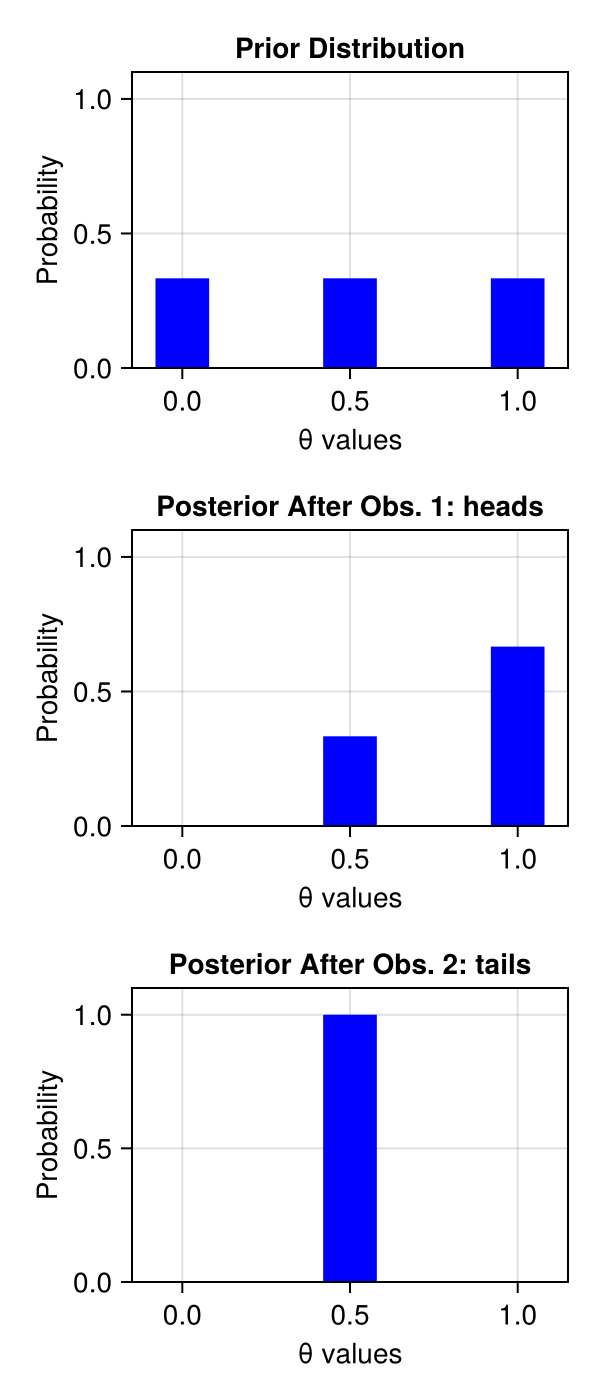

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/luisastue/.julia/packages/Makie/pFPBw/src/scenes.jl:238


CairoMakie.Screen{IMAGE}


In [26]:
using CairoMakie

# Define the fairness parameter θ and initialize prior
θ_values = [0.0, 0.5, 1.0]  # Discrete values for θ
prior = [1/3, 1/3, 1/3]     # Uniform prior P(θ)

# Function to perform Bayesian update
function bayesian_update(prior, θ_values, outcome)
    likelihood = outcome == "heads" ? θ_values : 1 .- θ_values
    unnormalized_posterior = likelihood .* prior
    posterior = unnormalized_posterior ./ sum(unnormalized_posterior)
    return posterior
end

# Define the sequence of observations
observations = ["heads", "tails"]

# Store posteriors for each step
posteriors = [prior]

for obs in observations
    posterior = bayesian_update(posteriors[end], θ_values, obs)
    push!(posteriors, posterior)
end

# Plot the results with prior at the top
function plot_posteriors_corrected(posteriors, θ_values, observations)
    num_plots = length(posteriors)  # Prior + number of observations
    fig = Figure(resolution = (300, 700))
    
    # Plot the prior first
    ax_prior = Axis(fig[1, 1], 
                    title = "Prior Distribution", 
                    xlabel = "θ values", 
                    ylabel = "Probability", 
                    limits = (-0.15, 1.15, -0, 1.1))  # Set y-axis to 0-1
    barplot!(ax_prior, θ_values, posteriors[1], width = 0.2, color = :blue, label = "Prior")
    
    # Plot posteriors in order
    for t in 1:length(observations)
        ax = Axis(fig[t+1, 1], 
                  title = "Posterior After Obs. $t: $(observations[t])", 
                  xlabel = "θ values", 
                  ylabel = "Probability", 
                  limits = (-0.15, 1.15, 0, 1.1))  # Set y-axis to 0-1
        barplot!(ax, θ_values, posteriors[t+1], width = 0.2, color = :blue, label = "Observation $(t)")
    end
    
    fig
end

# Display the subplots
fig = plot_posteriors_corrected(posteriors, θ_values, observations)
display(fig)



In [27]:
save("posterior_plot.png", fig)


CairoMakie.Screen{IMAGE}


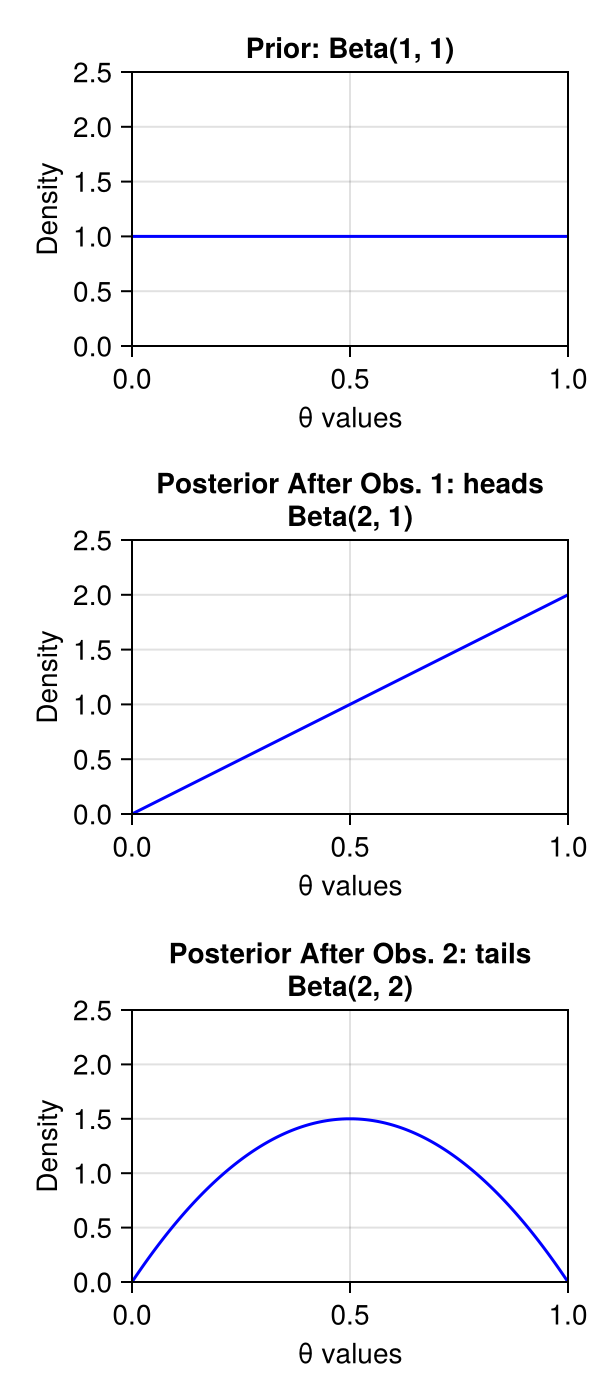

┌ Warning: Found `resolution` in the theme when creating a `Scene`. The `resolution` keyword for `Scene`s and `Figure`s has been deprecated. Use `Figure(; size = ...` or `Scene(; size = ...)` instead, which better reflects that this is a unitless size and not a pixel resolution. The key could also come from `set_theme!` calls or related theming functions.
└ @ Makie /Users/luisastue/.julia/packages/Makie/pFPBw/src/scenes.jl:238


CairoMakie.Screen{IMAGE}


In [31]:
using CairoMakie
using Distributions  # For Beta distribution

# Function to calculate posterior Beta distribution parameters
function beta_update(alpha_prior, beta_prior, observations)
    # Count heads and tails in the observations
    heads = count(x -> x == "heads", observations)
    tails = count(x -> x == "tails", observations)
    # Update Beta parameters
    alpha_post = alpha_prior + heads
    beta_post = beta_prior + tails
    return alpha_post, beta_post
end

# Function to plot prior and posterior Beta distributions
function plot_beta_distributions(alpha_prior, beta_prior, observations)
    num_plots = length(observations) + 1  # Prior + number of observations
    θ_values = range(0, 1, length=500)  # Continuous range for θ

    # Initialize figure
    fig = Figure(resolution = (300, 700))

    # Plot the prior Beta distribution
    ax_prior = Axis(fig[1, 1],
                    title = "Prior: Beta($alpha_prior, $beta_prior)",
                    xlabel = "θ values",
                    ylabel = "Density",
                    limits = (0, 1, 0, 2.5))
    beta_prior_dist = Beta(alpha_prior, beta_prior)
    lines!(ax_prior, θ_values, pdf.(beta_prior_dist, θ_values), color = :blue, label = "Prior")

    # Sequentially update and plot posteriors
    current_alpha, current_beta = alpha_prior, beta_prior
    for t in 1:length(observations)
        # Update Beta parameters
        current_alpha, current_beta = beta_update(alpha_prior, beta_prior, observations[1:t])

        # Plot posterior Beta distribution
        ax = Axis(fig[t+1, 1],
                  title = "Posterior After Obs. $t: $(observations[t])\nBeta($current_alpha, $current_beta)",
                  xlabel = "θ values",
                  ylabel = "Density",
                  limits = (0, 1, 0, 2.5))
        beta_post_dist = Beta(current_alpha, current_beta)
        lines!(ax, θ_values, pdf.(beta_post_dist, θ_values), color = :blue, label = "Posterior")
    end

    return fig
end

# Initial Beta prior parameters
alpha_prior = 1  # Uniform prior Beta(1, 1)
beta_prior = 1

# Define the sequence of observations
observations = ["heads", "tails"]

# Plot prior and posteriors
fig = plot_beta_distributions(alpha_prior, beta_prior, observations)
display(fig)


In [32]:
save("beta_posteriors.png", fig)


CairoMakie.Screen{IMAGE}
